In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from statsmodels.tsa.arima_model import ARMA

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

from statsmodels.tsa.seasonal import seasonal_decompose

In [436]:
arma_df = pd.read_csv(r"C:\Users\James Stanley\Documents\GitHub\backtest_utilities\data\market_data\daily\stocks\BATS_EWU, 1D.csv",index_col='time', parse_dates=True)

In [437]:
log_diff = np.log(arma_df['close']).diff(1).dropna(axis=0)

In [438]:
len(log_diff)

6776

In [439]:
import statsmodels.api as sm

acf, ci = sm.tsa.acf(log_diff,nlags=5, alpha=0.05)
pacf, ci = sm.tsa.pacf(log_diff,nlags=5, alpha=0.05)

acf[0]
pacf[4]

-0.01867470060683665

In [440]:
ci

array([[ 1.00000000e+00,  1.00000000e+00],
       [-1.33615446e-01, -8.59952267e-02],
       [-4.43055328e-02,  3.31468614e-03],
       [-3.07130512e-02,  1.69071678e-02],
       [-4.24848101e-02,  5.13540888e-03],
       [-4.76292373e-02, -9.01834617e-06]])

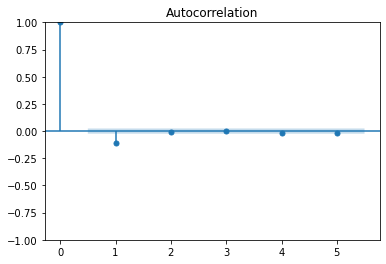

In [441]:
plot_acf(log_diff, alpha=0.05, lags=5).savefig("acf.jpg")

c:\Users\James Stanley\anaconda3\envs\airflow-env\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


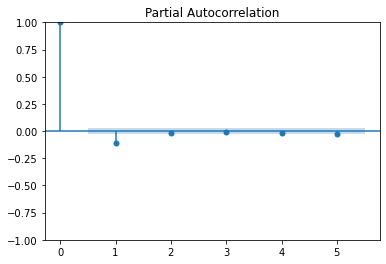

In [442]:
plot_pacf(log_diff, alpha=0.05, lags=5).savefig("pacf.jpg")

In [443]:
print(len(arma_df))

6777


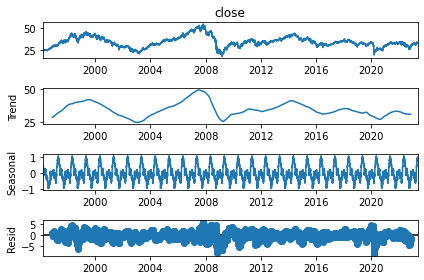

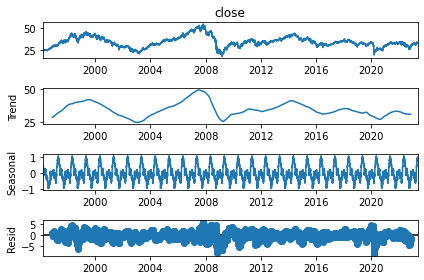

In [444]:
seasonal_result = seasonal_decompose(arma_df['close'], model="additive",period=252)

trend    = seasonal_result.trend
seasonal = seasonal_result.seasonal
residual = seasonal_result.resid

seasonal_result.plot()

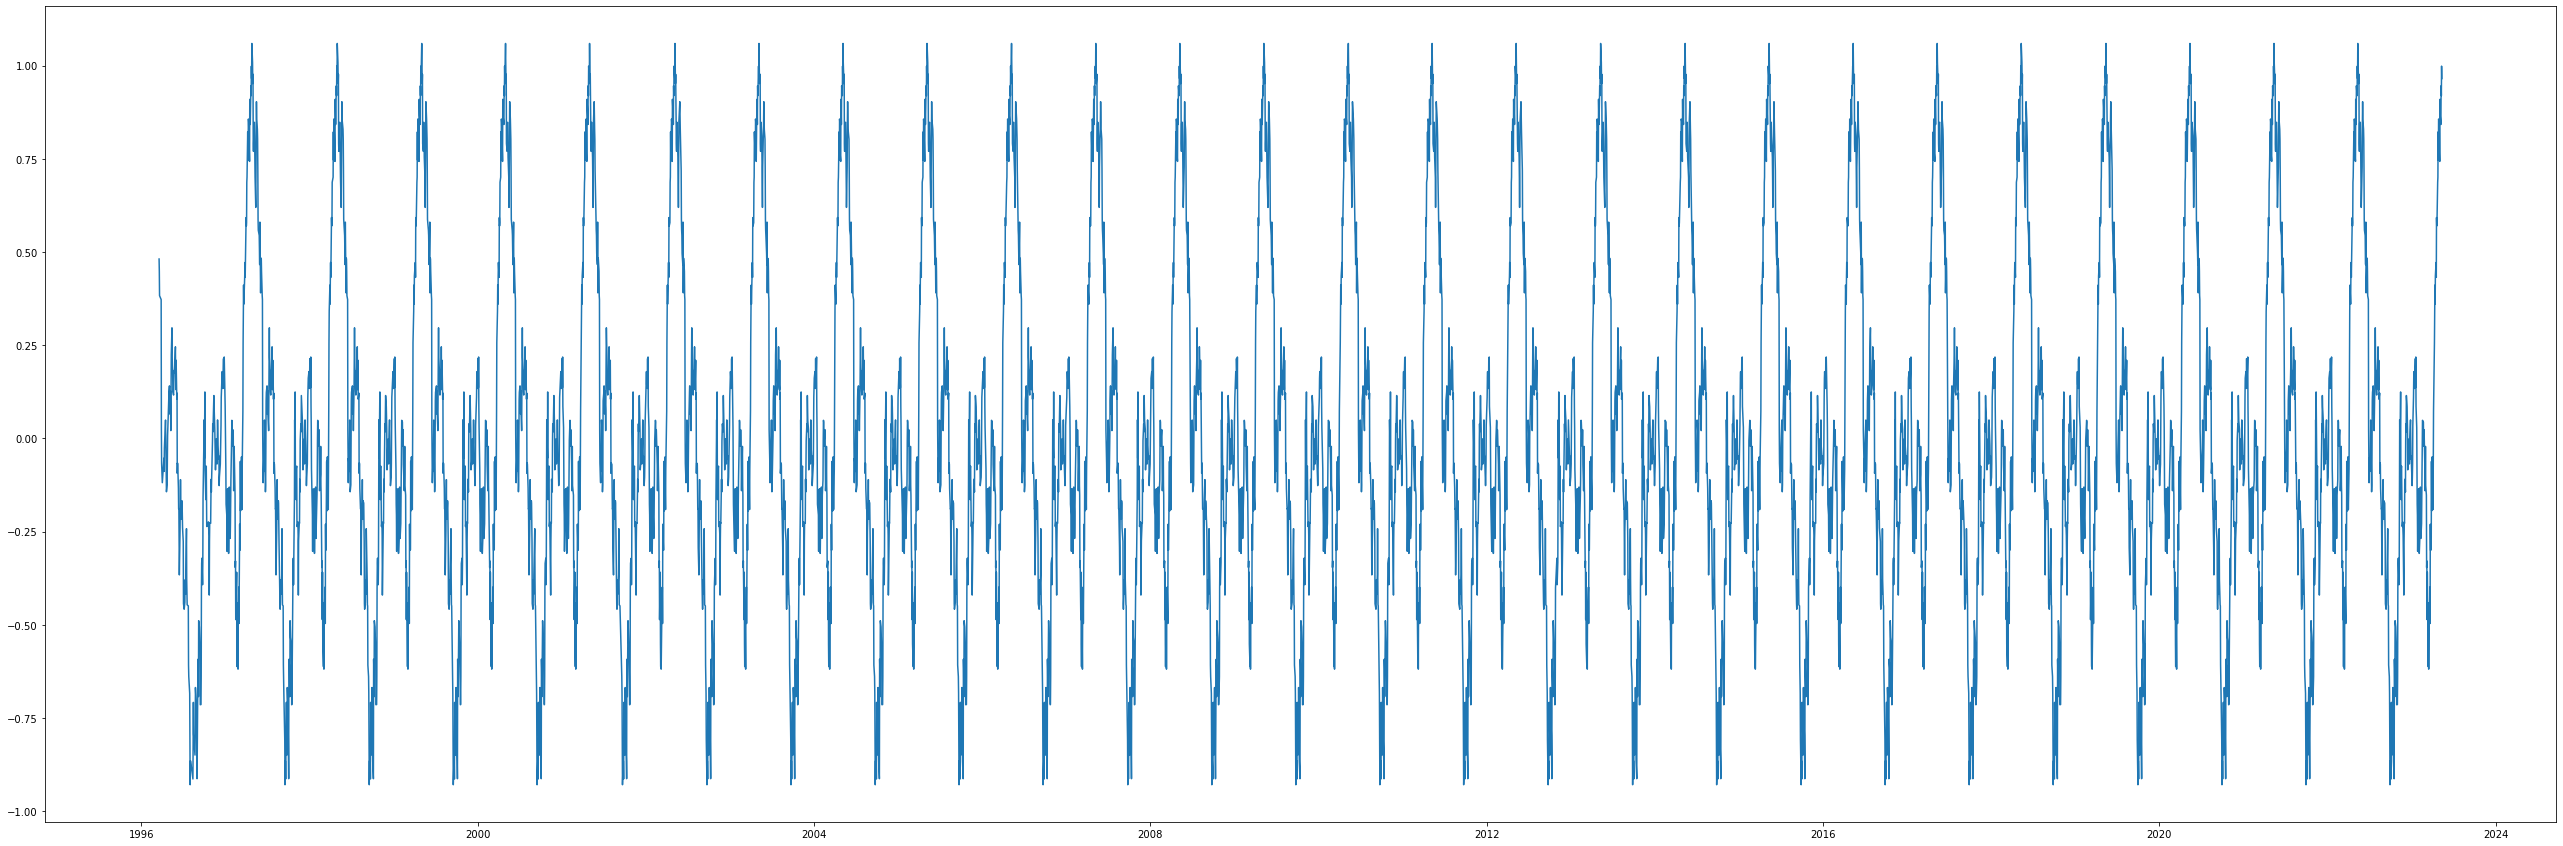

In [445]:
plt.figure(figsize=(45,15))

plt.plot(seasonal)

plt.show()

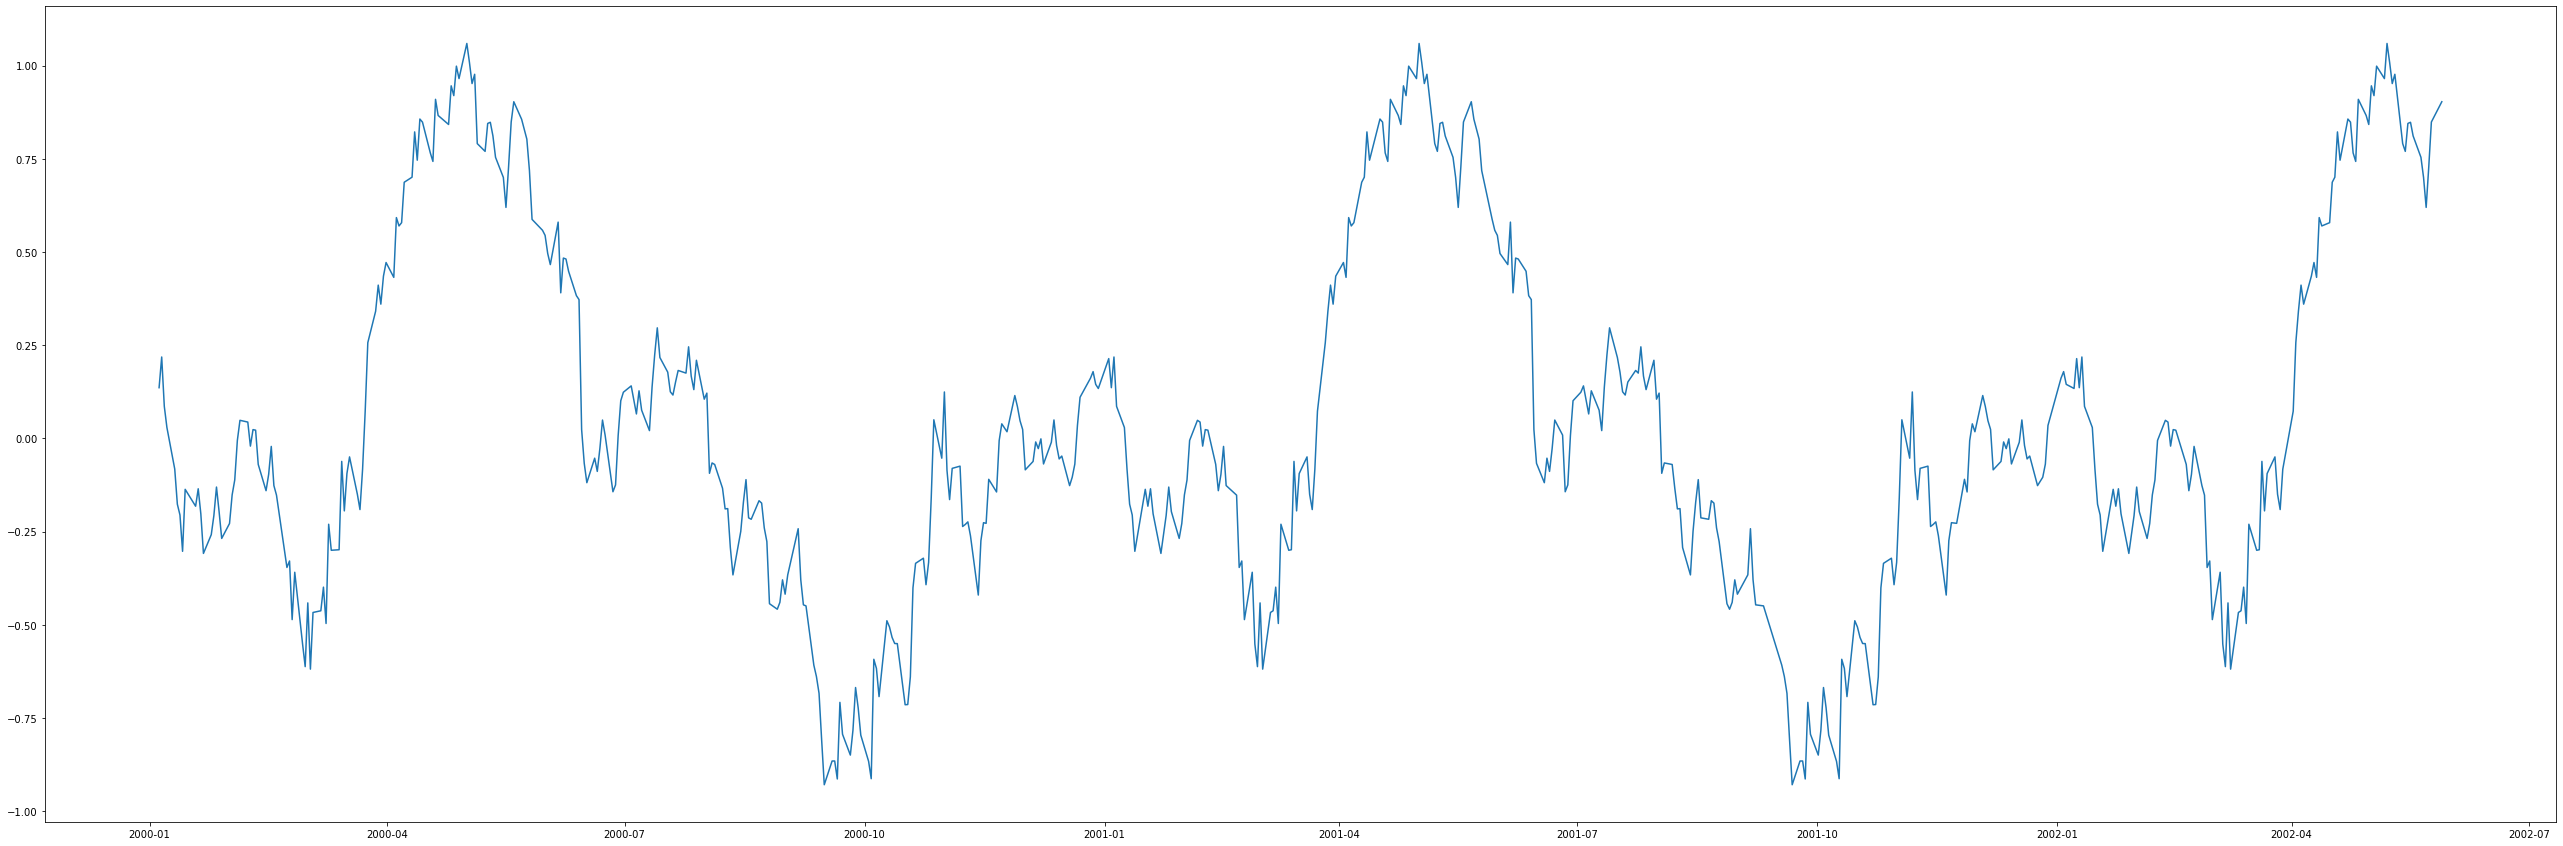

In [446]:
plt.figure(figsize=(45,15))

plt.plot(seasonal[900:1500])

plt.show()

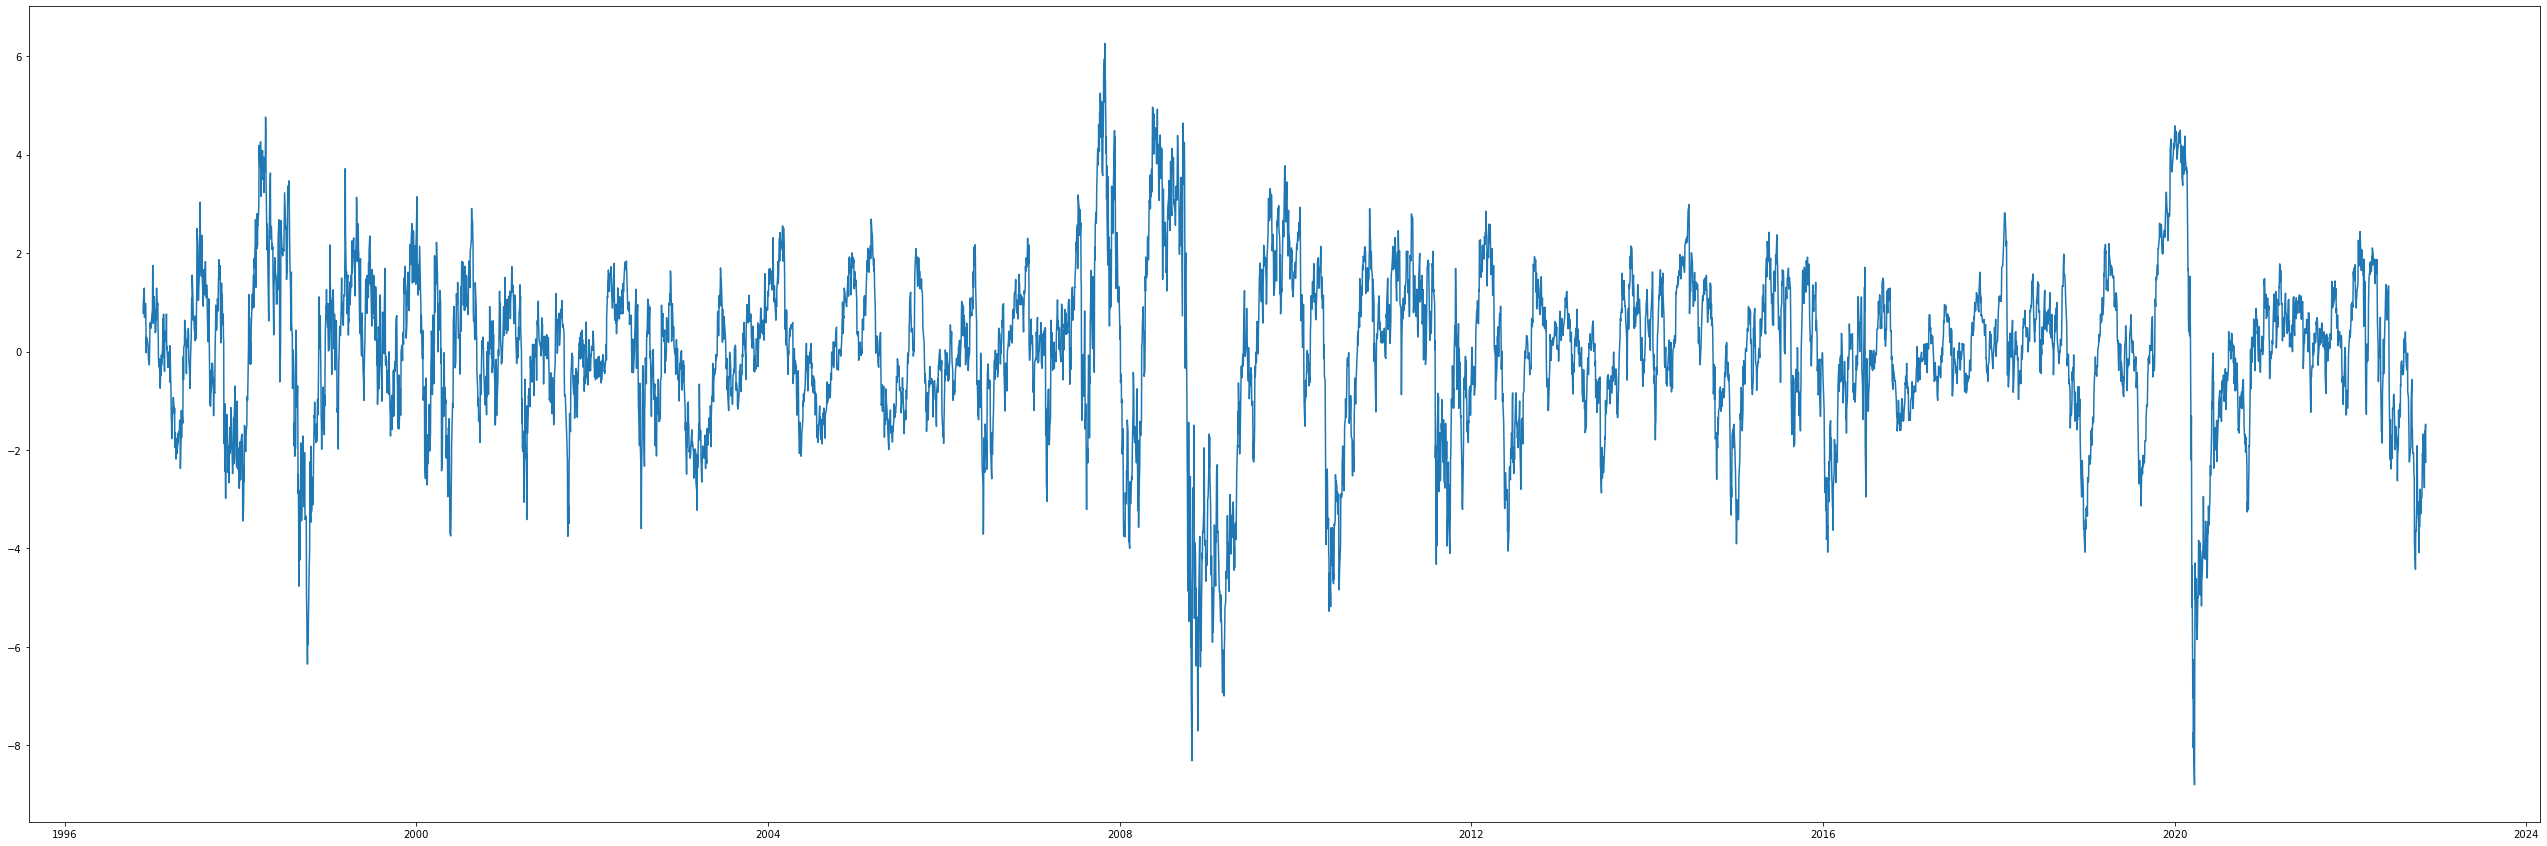

In [447]:
plt.figure(figsize=(45,15))

plt.plot(residual)

plt.show()

In [448]:
log_diff = np.log(arma_df['close']).diff(1).dropna(axis=0)

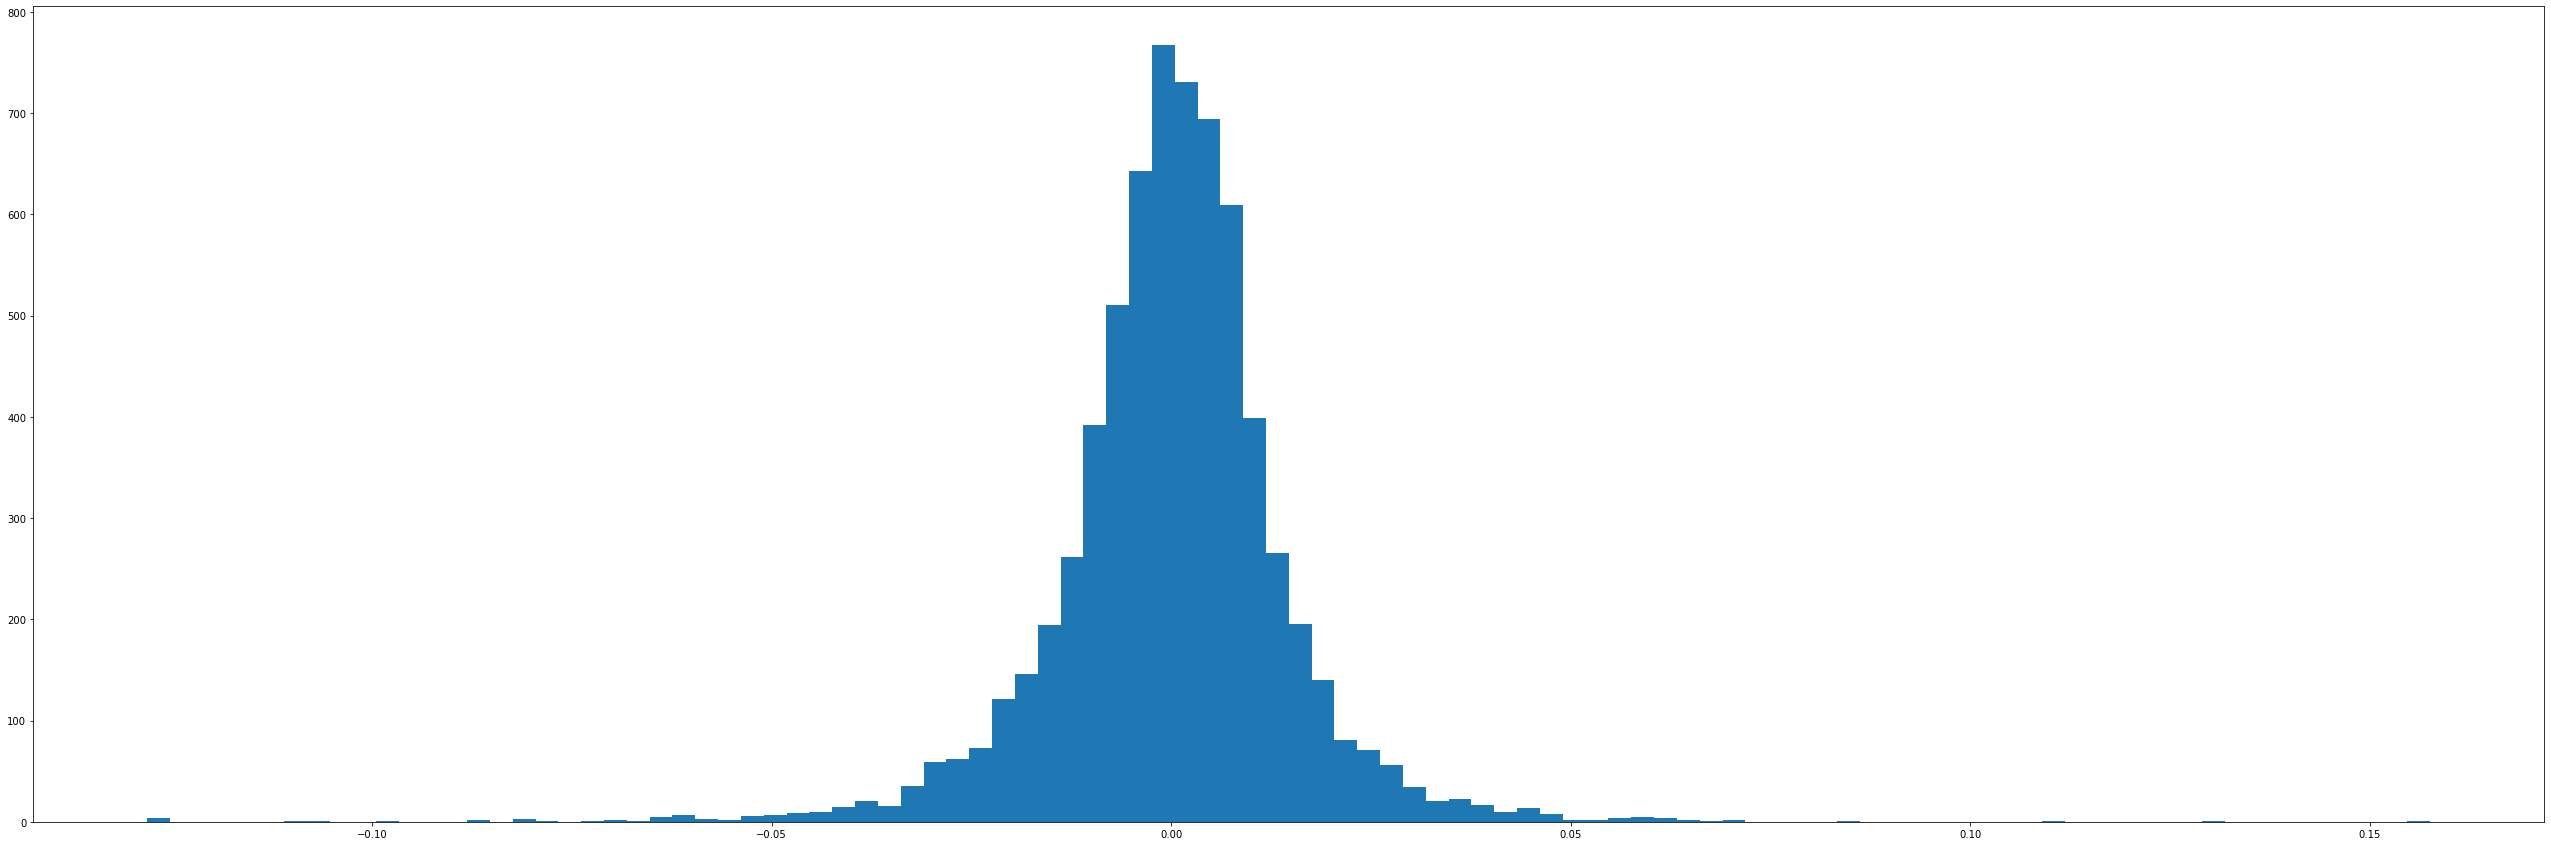

In [449]:
plt.figure(figsize=(45,15))

plt.hist(log_diff,bins=100)

plt.show()

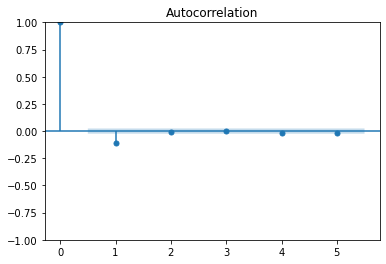

In [450]:
plot_acf(log_diff, alpha=0.05, lags=5).savefig("acf.jpg")

c:\Users\James Stanley\anaconda3\envs\airflow-env\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


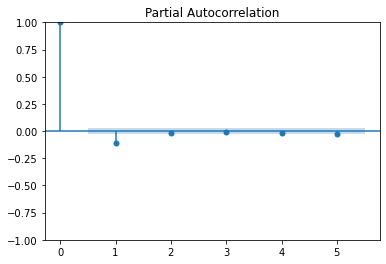

In [451]:
plot_pacf(log_diff, alpha=0.05, lags=5).savefig("pacf.jpg")